In [1]:
from cftime import DatetimeNoLeap
from os import chdir, system
from numpy import float64, multiply
from xarray import open_dataset

In [2]:
chdir('/home/zhangc/repositories/nc2im_cesm2/static_data/')

In [ ]:
dt = 2015, 1, 1, 0
data_time = DatetimeNoLeap(dt[0], dt[1], dt[2], dt[3])
file_time = str(data_time).replace(' ', '_')

In [8]:
ds = open_dataset('fracdata_0.9x1.25_gx1v6_c090317.nc')

In [10]:
ds.LANDMASK

<xarray.DataArray 'LANDMASK' (lsmlat: 192, lsmlon: 288)>
array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)
Dimensions without coordinates: lsmlat, lsmlon
Attributes:
    long_name:  land/ocean mask
    units:      0=ocean and 1=land

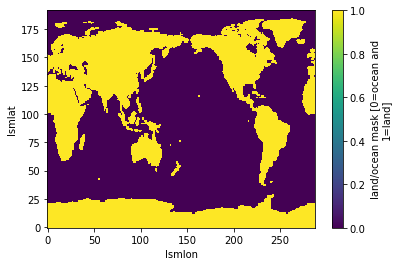

In [11]:
ds.LANDMASK.plot()